# **CLASE 5: Clasifición binaria (Regresión Logística).**





In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [5]:
ruta_archivo = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(ruta_archivo)

In [8]:
print(df.head())
print(df.info())
print(df.describe(include='all'))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

## **Preparación de datos**
En el mundo real, los datos no vienen "listos para la foto". Si intentamos alimentar un modelo de Machine Learning con texto o valores nulos, el código fallará o, peor aún, nos dará resultados engañosos (Garbage In, Garbage Out).

**¿Por qué transformamos los datos?**
Compatibilidad Matemática: Los modelos (como la Regresión Logística que veremos hoy) solo entienden números. No saben qué es un "Método de Pago" hasta que lo convertimos en vectores numéricos (0 y 1).

**Consistencia de Variables**: Variables como MonthlyCharges y TotalCharges tienen escalas distintas. Aunque hoy nos enfocaremos en la codificación, preparar estas columnas asegura que ninguna variable "domine" a la otra injustamente.

**Manejo de Categorías** (One-Hot Encoding): Al usar OneHotEncoder, transformamos una columna de texto en varias columnas binarias. Esto permite al modelo asignar un "peso" o importancia a cada método de pago por separado.

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df[['MonthlyCharges', 'PaymentMethod','TotalCharges']]
y = df['Churn']

# DEFINICIÓN DE VARIABLES
# 'PaymentMethod' es categórica, las otras son numéricas
categorical_cols = ['PaymentMethod']
numerical_cols = ['MonthlyCharges', 'TotalCharges']

# CREACIÓN DEL TRANSFORMADOR
# Esto aplica OneHot a las categorías y deja las numéricas tal cual (passthrough)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ])

# APLICACIÓN
# Transformamos X
X_raw = df[categorical_cols + numerical_cols]
X_transformed = preprocessor.fit_transform(X_raw)

# Recuperamos los nombres de las columnas para que el DataFrame sea interpretable
column_names = (preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist() +
                numerical_cols)

X = pd.DataFrame(X_transformed, columns=column_names)

# Convertimos a numérico forzando errores a NaN (por si hay espacios en blanco)
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')


# Convertimos a binaria
y = df['Churn'].map({'Yes': 1, 'No': 0})

print(X.info())
print(y.head())
print(len(y))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   PaymentMethod_Bank transfer (automatic)  7043 non-null   float64
 1   PaymentMethod_Credit card (automatic)    7043 non-null   float64
 2   PaymentMethod_Electronic check           7043 non-null   float64
 3   PaymentMethod_Mailed check               7043 non-null   float64
 4   MonthlyCharges                           7043 non-null   float64
 5   TotalCharges                             7032 non-null   float64
dtypes: float64(6)
memory usage: 330.3 KB
None
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64
7043


## **Tratamiento de nulos (Importante en Business Analytics)**

In [26]:
X['TotalCharges'] = X['TotalCharges'].fillna(X['TotalCharges'].mean())

# 5. DIVISIÓN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dataset listo")
print(X.info())

Dataset listo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   PaymentMethod_Bank transfer (automatic)  7043 non-null   float64
 1   PaymentMethod_Credit card (automatic)    7043 non-null   float64
 2   PaymentMethod_Electronic check           7043 non-null   float64
 3   PaymentMethod_Mailed check               7043 non-null   float64
 4   MonthlyCharges                           7043 non-null   float64
 5   TotalCharges                             7043 non-null   float64
dtypes: float64(6)
memory usage: 330.3 KB
None


## **ENTRENAMIENTO DEL MODELO**

La Regresión Logística es muy utilizado en la clasificación por su explicabilidad.

In [27]:
modelo_log = LogisticRegression()
modelo_log.fit(X_train, y_train)

LogisticRegression()

## **PREDICCIÓN DE PROBABILIDADES**

A diferencia de la lineal, aquí podemos ver la "duda" del modelo

In [35]:
probabilidades = modelo_log.predict_proba(X_test)[:, 1]
predicciones = modelo_log.predict(X_test)
X_test['Probabilidad'] = probabilidades
X_test['Predicción'] = predicciones
print(X_test.head())

      PaymentMethod_Bank transfer (automatic)  \
185                                       0.0   
2715                                      1.0   
3825                                      0.0   
1807                                      0.0   
132                                       1.0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
185                                     0.0                             1.0   
2715                                    0.0                             0.0   
3825                                    0.0                             0.0   
1807                                    0.0                             1.0   
132                                     0.0                             0.0   

      PaymentMethod_Mailed check  MonthlyCharges  TotalCharges  Probabilidad  \
185                          0.0           24.80         24.80      0.246037   
2715                         0.0           25.25        996.45      0.

## **EVALUACIÓN: LA MATRIZ DE CONFUSIÓN**

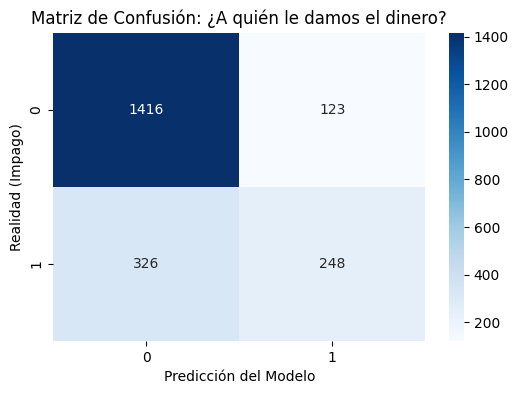

In [31]:
cm = confusion_matrix(y_test, predicciones)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Realidad (Impago)')
plt.title('Matriz de Confusión: ¿A quién le damos el dinero?')
plt.show()

## **INFORME DE NEGOCIO**

In [34]:
print(f"Precisión General (Accuracy): {accuracy_score(y_test, predicciones):.2f}")
print(classification_report(y_test, predicciones))

Precisión General (Accuracy): 0.79
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1539
           1       0.67      0.43      0.52       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.69      2113
weighted avg       0.77      0.79      0.77      2113



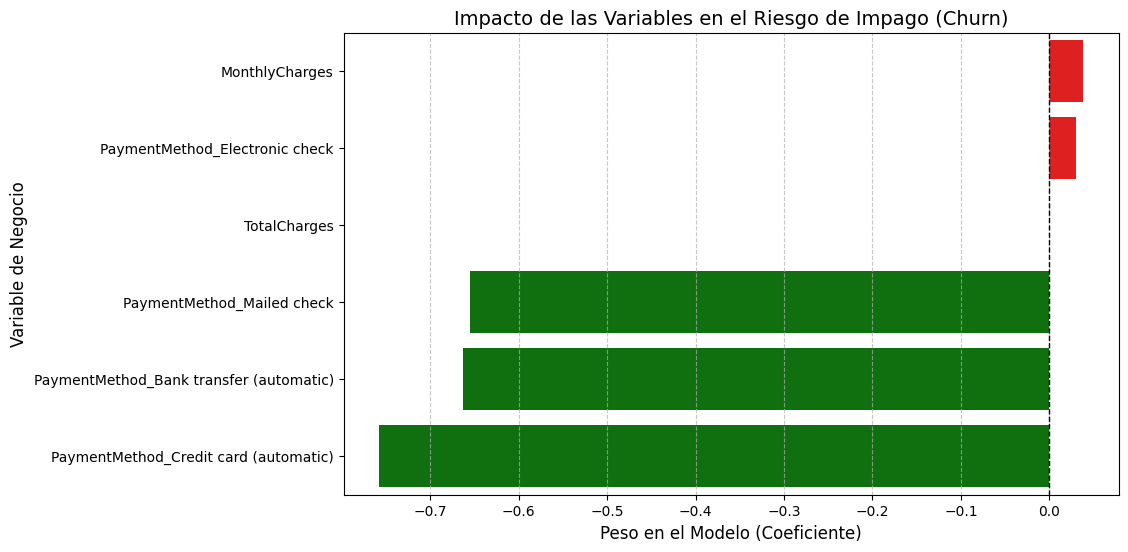

In [33]:
df_coefs = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo_log.coef_[0]
})

# Ordenamos de mayor a menor impacto
df_coefs = df_coefs.sort_values(by='Coeficiente', ascending=False)

# 3. Graficamos
plt.figure(figsize=(10, 6))
colors = ['red' if x > 0 else 'green' for x in df_coefs['Coeficiente']] # Rojo riesgo, Verde protección

sns.barplot(x='Coeficiente', y='Variable', data=df_coefs, palette=colors)

plt.axvline(x=0, color='black', linestyle='--', linewidth=1) # Línea neutral
plt.title('Impacto de las Variables en el Riesgo de Impago (Churn)', fontsize=14)
plt.xlabel('Peso en el Modelo (Coeficiente)', fontsize=12)
plt.ylabel('Variable de Negocio', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

## **Interpretación**
- Barras a la Derecha (Positivas/Rojo): Son "factores de riesgo". Si esta variable aumenta, la probabilidad de que el cliente se vaya (o no pague) sube. Por ejemplo, un MonthlyCharges muy alto suele empujar hacia la derecha.

- Barras a la Izquierda (Negativas/Verde): Son "factores de retención". Si esta variable aumenta, el riesgo baja. Por ejemplo, tener un contrato a largo plazo debería empujar la barra hacia la izquierda.

- La longitud de la barra: Indica la potencia de influencia. Una barra muy larga es una "palanca de cambio" clave para el negocio.